# Module 5 Homework Assignments 
<i>Neural Networks and Gradient Descent </i>
<i>Filipp Krasovsky, August 1, 2021</i>

## Dataset: MNIST
The MNIST dataset is a set of images of handwritten digits from 0-9. They are a series of small images that have been aligned and scaled to be a similar size and orientation. I recommend loading the data using Keras if possible https://keras.io/api/datasets/mnist/. 


In [1]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from mlxtend.plotting import plot_decision_regions

## The XOR Problem

Using the provided sample code, create sample data for the XOR problem. Plot these data, color-coded by the labels (category). 
Use sklearn’s perceptron function to train a classifier on these data. What error do you obtain? Plot the confusion matrix and use metrics.classification_report to make a table of classification results. 


In [3]:
#create sample XOR data.
rng = np.random.RandomState(0)
X = rng.randn(1000, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

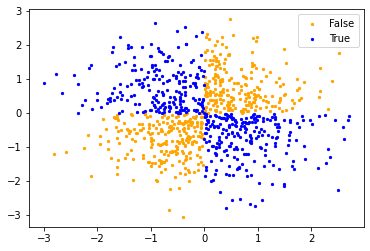

In [4]:
#plot data, color coded by label
cdict = {True: 'blue', False: 'orange'}

fig, ax = plt.subplots()
for g in np.unique(y_train):
    ix = np.where(y_train == g)
    ax.scatter(X_train[ix,0],X_train[ix,1],c = cdict[g], label = g, s = 5)
ax.legend()
plt.show()

In [5]:
#use the sklearn perceptron to train a classifier on this dataset and observe the error:
clf = Perceptron( random_state=42)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
clf_pred = clf.predict(X_test)

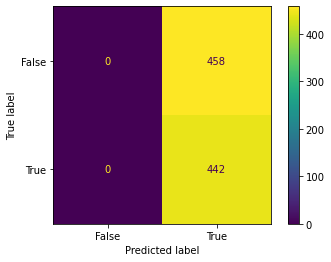

In [6]:
#plot confusion matrix and classification results
plot_confusion_matrix(clf,X_train,y_train)

In [7]:

print(classification_report(clf_pred,y_test))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         0
        True       1.00      0.32      0.48       100

    accuracy                           0.32       100
   macro avg       0.50      0.16      0.24       100
weighted avg       1.00      0.32      0.48       100



C:\Users\13234\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13234\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\13234\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In conclusion, we get incredibly low accuracy and precision for the False class and  high precision for the True class. Our perceptron classifier performs poorly.

In [8]:
#Next we create a neural net with backpropagation:
nnet = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, alpha=1e-4,
solver='lbfgs', verbose=True, random_state=1,
learning_rate_init=.1)

In [9]:
#fit model
nnet.fit(X_train,y_train)
#predict
nnet_pred = nnet.predict(X_test)

In [10]:
print(classification_report(nnet_pred,y_test))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99        68
        True       0.97      0.97      0.97        32

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



<AxesSubplot:>

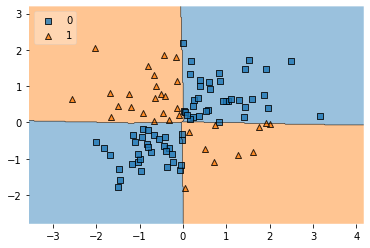

In [11]:
#plot the test set and our decision boundary.
plot_decision_regions(X_test,y_test.astype(np.int64),clf=nnet,legend=2)

## Moons Dataset

In [12]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.3, random_state=0)

In [13]:
#next, make a range of 1 to 20 hidden units and train the nnet with each value, plotting as we go:
hidden_layers = range(1,21)

C:\Users\13234\Miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


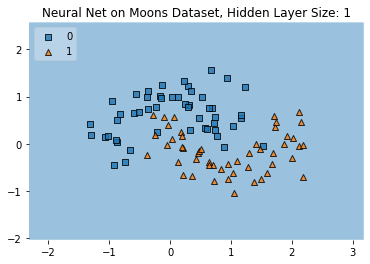

C:\Users\13234\Miniconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


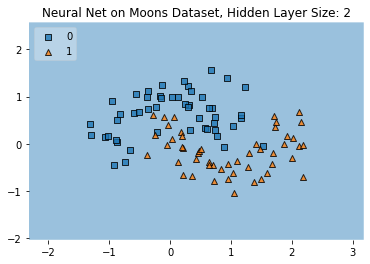

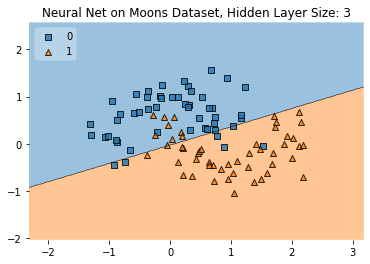

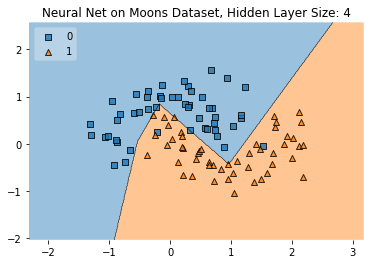

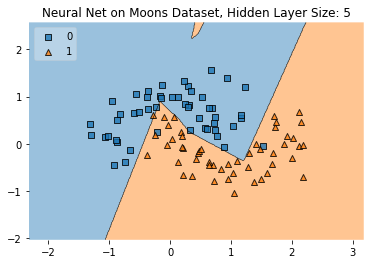

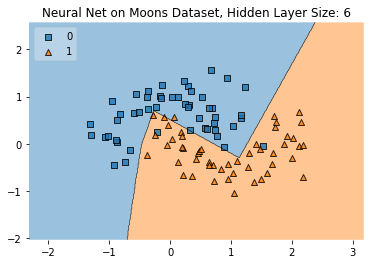

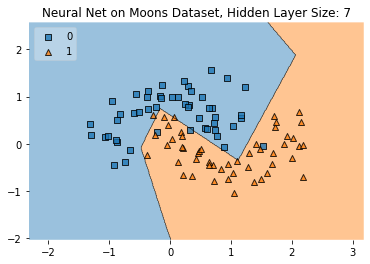

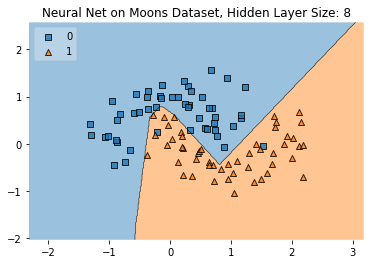

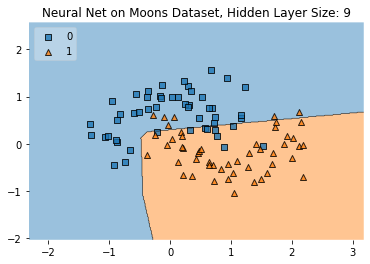

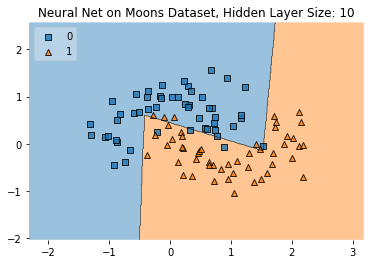

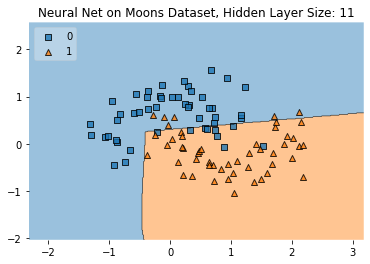

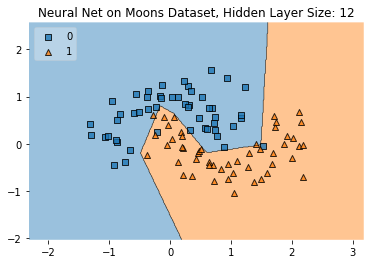

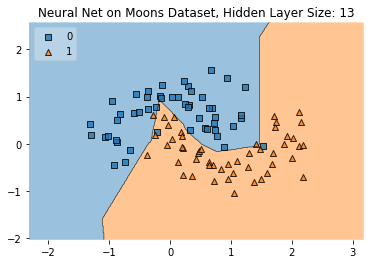

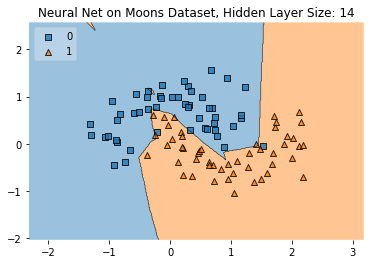

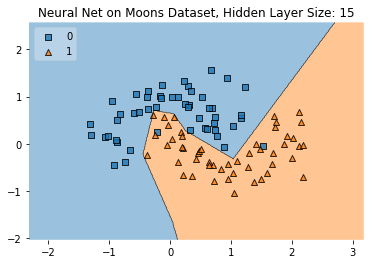

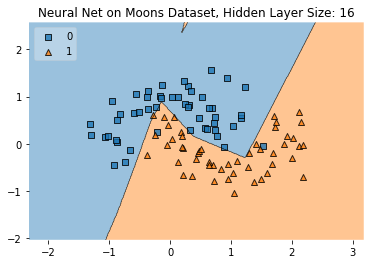

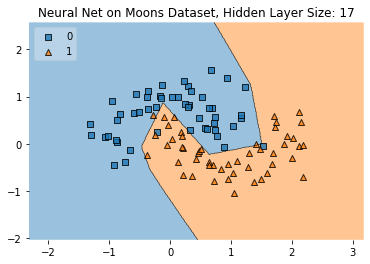

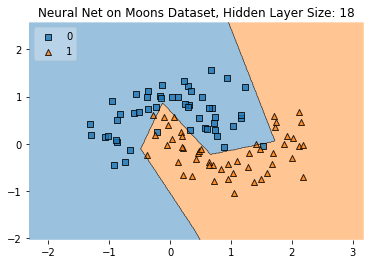

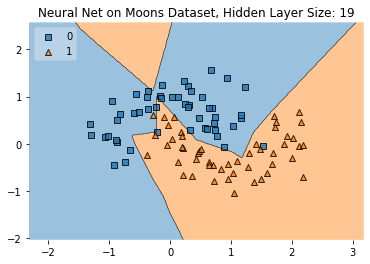

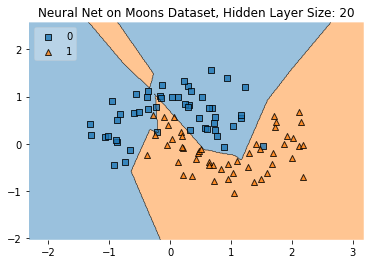

In [14]:
for hidden_layer in hidden_layers:
    #create our neural net
    nnet = MLPClassifier(hidden_layer_sizes=(hidden_layer,), max_iter=1000, alpha=1e-4,
    solver='lbfgs', verbose=True, random_state=1,
    learning_rate_init=.1)
    #fit model
    nnet.fit(X,y)
    #plot the train set and our decision boundary.
    plot_decision_regions(X,y,clf=nnet,legend=2)
    plt.title('Neural Net on Moons Dataset, Hidden Layer Size: '+ str(hidden_layer))
    plt.show()

## MNIST Dataset

In [25]:
#load in our image dataset from keras.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#sanity check
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

#reshape our data to be compatible with sklearn.
nsamples, nx, ny = x_train.shape
x_train_d2 = x_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = x_test.shape
x_test_d2 = x_test.reshape((nsamples,nx*ny))

In [26]:
#use the sklearn perceptron to train a classifier on this dataset and observe the error:
clf = Perceptron( random_state=42)
clf.fit(x_train_d2,y_train)
clf_pred = clf.predict(x_test_d2)
accuracy_score(clf_pred,y_test)

0.8892

C:\Users\13234\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\13234\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\13234\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter

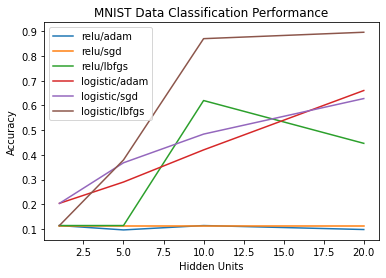

In [36]:
#optimize across three different metrics:
hidden_units = [1,5,10,20]
solver = ['adam','sgd','lbfgs']
activation = ['relu','logistic']
scores = {}

for a in activation:
    scores[a] = {}
    for s in solver:
        scores[a][s] = []
        for h in hidden_units:
            #train our classifier
            clf = MLPClassifier(
            hidden_layer_sizes=(h,), 
            max_iter=1000, 
            alpha=1e-4,
            solver=s, 
            activation=a,
            random_state=1,
            learning_rate_init=.1)
            #fit, record accuracy
            clf.fit(x_train_d2,y_train)
            clf_pred = clf.predict(x_test_d2)
            scores[a][s].append(accuracy_score(clf_pred,y_test))
        plt.plot(hidden_units,scores[a][s],label=a+"/"+s)
plt.legend()
plt.xlabel("Hidden Units")
plt.ylabel("Accuracy")
plt.title("MNIST Data Classification Performance")
plt.show()


In [37]:
scores

{'relu': {'adam': [0.1135, 0.0958, 0.1135, 0.0974],
  'sgd': [0.1135, 0.1135, 0.1135, 0.1135],
  'lbfgs': [0.1135, 0.1135, 0.62, 0.4466]},
 'logistic': {'adam': [0.2035, 0.2898, 0.42, 0.6606],
  'sgd': [0.2033, 0.3678, 0.484, 0.628],
  'lbfgs': [0.1135, 0.3793, 0.8707, 0.8967]}}